# Importing the Liberaries

In [2391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasest

In [2392]:
df=pd.read_csv('Sport car price.csv')

# Understand each coloumns

In [2393]:
df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [2394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [2395]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [2396]:
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

# Data cleaning

* Handling the null values

In [2397]:
df[['Engine Size (L)','Torque (lb-ft)']]=df[['Engine Size (L)','Torque (lb-ft)']].fillna('N/A')

In [2398]:
df.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [2399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          1007 non-null   object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1007 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [2400]:
df.head(2)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"


* Converting the datatype

In [2401]:
df['Horsepower'].value_counts()

Horsepower
503        45
591        39
650        31
660        30
416        29
           ..
10,000+     1
485         1
1,020       1
1872        1
621         1
Name: count, Length: 124, dtype: int64

In [2402]:
df['Horsepower']=df['Horsepower'].str.replace(',+','')

In [2403]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'],errors='coerce')

In [2404]:
df['Torque (lb-ft)'].shape

(1007,)

In [2405]:
df['Torque (lb-ft)']=df['Torque (lb-ft)'].str.replace(',','')

In [2406]:
df['Torque (lb-ft)']=pd.to_numeric(df['Torque (lb-ft)'],errors='coerce')

In [2407]:
df['0-60 MPH Time (seconds)'].shape

(1007,)

In [2408]:
df['0-60 MPH Time (seconds)']=df['0-60 MPH Time (seconds)'].str.replace(',','')

In [2409]:
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'],errors='coerce')

In [2410]:
df['Price (in USD)'].shape

(1007,)

In [2411]:
df['Price (in USD)']=df['Price (in USD)'].str.replace(',','')

In [2412]:
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')

In [2413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   object 
 1   Car Model                1007 non-null   object 
 2   Year                     1007 non-null   int64  
 3   Engine Size (L)          1007 non-null   object 
 4   Horsepower               998 non-null    float64
 5   Torque (lb-ft)           1002 non-null   float64
 6   0-60 MPH Time (seconds)  1006 non-null   float64
 7   Price (in USD)           1007 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 63.1+ KB


In [2414]:
df.head(4)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379.0,331.0,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.0,333750
3,Audi,R8,2022,5.2,562.0,406.0,3.2,142700


# Data Transformaniton

* Remaning the Coloumns

In [2415]:
df=df.rename(columns={'Engine Size (L)':'Engine_Size',
                    'Torque (lb-ft)':'Torque',
                    '0-60 MPH Time (seconds)':'Accelration',
                    'Price (in USD)':'Price'})

In [2416]:
df

,Car Make,Car Model,Year,Engine_Size,Horsepower,Torque,Accelration,Price
0,Porsche,911,2022,3,379.0,331.0,4.00,101200
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700
4,McLaren,720S,2021,4,710.0,568.0,2.70,298000
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280.0,1106.0,2.50,3000000
1003,Lotus,Evija,2021,Electric Motor,1972.0,1254.0,2.00,2000000
1004,McLaren,Senna,2021,4,789.0,590.0,2.70,1000000
1005,Pagani,Huayra,2021,6,764.0,738.0,3.00,2600000


# ANALYSIS

1. What is the average price of the cars in this dataset?

In [2417]:
df['Price'].mean()

np.float64(382035.9414101291)

2. Which car make appears most frequently?

In [2418]:
df['Car Make'].value_counts().idxmax()

'Porsche'

3. What is the average horsepower and torque across all cars?

In [2419]:
df[['Horsepower','Torque']].mean()

Horsepower    627.324649
Torque        550.148703
dtype: float64

4. What is the average 0-60 acceleration time?

In [2420]:
df['Accelration'].mean().round(2)

np.float64(3.52)

5. How do electric cars compare to gasoline cars in terms of performance and price?

In [2421]:
# df['hp_bin'] = pd.cut(df['Horsepower'], bins=[0, 100, 200, 300, 400, 500], labels=['0-100', '101-200', '201-300', '301-400', '401-500'])
# df.groupby('hp_bin')[['Horsepower', 'Torque', 'Accelration', 'Price']].mean()


In [2422]:
df.head(2)

,Car Make,Car Model,Year,Engine_Size,Horsepower,Torque,Accelration,Price
0,Porsche,911,2022,3,379.0,331.0,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.8,274390


In [2423]:
def get_fuel_type(x):
    if x == 'Electric Motor':
        return 'Electric'
    else:
        return 'Gasoline'

df['fuel_type'] = df['Engine_Size'].apply(get_fuel_type)


In [2424]:
df.tail(5)

,Car Make,Car Model,Year,Engine_Size,Horsepower,Torque,Accelration,Price,fuel_type
1002,Koenigsegg,Jesko,2022,5,1280.0,1106.0,2.50,3000000,Gasoline
1003,Lotus,Evija,2021,Electric Motor,1972.0,1254.0,2.00,2000000,Electric
1004,McLaren,Senna,2021,4,789.0,590.0,2.70,1000000,Gasoline
1005,Pagani,Huayra,2021,6,764.0,738.0,3.00,2600000,Gasoline
1006,Rimac,Nevera,2021,Electric Motor,1888.0,1696.0,1.85,2400000,Electric


6. How many cars have an electric motor?

In [2425]:
df[df['Engine_Size']=='Electric Motor'].shape[0]

3

7. Which car has the highest horsepower?

In [2426]:
df.loc[df['Horsepower'].idxmax()]


Car Make          Lotus
Car Model         Evija
Year               2021
Engine_Size    Electric
Horsepower       2000.0
Torque           1254.0
Accelration         2.8
Price           2800000
fuel_type      Gasoline
Name: 877, dtype: object

8. Which car has the fastest acceleration?

In [2427]:
df.groupby(['Car Make'])['Accelration'].max().sort_values(ascending=False).head(1)


Car Make
Mazda    6.5
Name: Accelration, dtype: float64

In [2428]:
df

,Car Make,Car Model,Year,Engine_Size,Horsepower,Torque,Accelration,Price,fuel_type
0,Porsche,911,2022,3,379.0,331.0,4.00,101200,Gasoline
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390,Gasoline
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750,Gasoline
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700,Gasoline
4,McLaren,720S,2021,4,710.0,568.0,2.70,298000,Gasoline
...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280.0,1106.0,2.50,3000000,Gasoline
1003,Lotus,Evija,2021,Electric Motor,1972.0,1254.0,2.00,2000000,Electric
1004,McLaren,Senna,2021,4,789.0,590.0,2.70,1000000,Gasoline
1005,Pagani,Huayra,2021,6,764.0,738.0,3.00,2600000,Gasoline


9. Correlation between Price and horsepower

In [2429]:
c=df[['Price','Horsepower']]
c.corr(numeric_only=True)

,Price,Horsepower
Price,1.000000,0.797761
Horsepower,0.797761,1.000000


10. Correlation between price and acceleration

In [ ]:
df[['Price', 'Accelration']].corr()

,Price,Accelration
Price,1.000000,-0.498502
Accelration,-0.498502,1.000000


11. Do more expensive cars have better performance?

In [2431]:
df[['Price','Horsepower','Torque','Accelration']].corr()


,Price,Horsepower,Torque,Accelration
Price,1.000000,0.797761,0.545575,-0.498502
Horsepower,0.797761,1.000000,0.941384,-0.734065
Torque,0.545575,0.941384,1.000000,-0.560113
Accelration,-0.498502,-0.734065,-0.560113,1.000000


12. Top 5 most expensive cars

In [2432]:
top_5_expensive=df.sort_values(by='Price',ascending=False).head(5)
print(top_5_expensive[['Car Make','Price']])


        Car Make    Price
823      Bugatti  5200000
541      Bugatti  5200000
983      Bugatti  3900000
438  Lamborghini  3600000
624      Bugatti  3599000


13. Top 5 fastest cars (lowest acceleration)

In [2433]:
top_5_fastcar=df.sort_values(by='Accelration',ascending=True).head(5)
print(top_5_fastcar[['Car Make','Car Model','Accelration']])


     Car Make Car Model  Accelration
387     Rimac     C_Two         1.80
439     Rimac     C_Two         1.80
1006    Rimac    Nevera         1.85
824     Rimac    Nevera         1.85
352     Rimac    Nevera         1.85


14.  Top car brands by average horsepower

In [2434]:
df.groupby('Car Make')['Horsepower'].mean().sort_values(ascending=False).head()


Car Make
Rimac          1910.285714
Pininfarina    1873.000000
Bugatti        1502.318182
Koenigsegg     1364.133333
Ultima         1200.000000
Name: Horsepower, dtype: float64

15. Top 5 affordable high-horsepower cars

In [2435]:
df[['Horsepower','Price']].mean()

Horsepower       627.324649
Price         382035.941410
dtype: float64

In [2436]:
df[df['Horsepower']>627].sort_values('Price')[['Car Make','Car Model','Horsepower','Price']].head(5)


,Car Make,Car Model,Horsepower,Price
904,Dodge,Challenger SRT Hellcat,717.0,60695
12,Dodge,Challenger SRT Hellcat,717.0,61000
485,Dodge,Challenger SRT Hellcat,717.0,61500
200,Chevrolet,Camaro ZL1,650.0,62000
465,Chevrolet,Camaro ZL1,650.0,62000


In [2437]:
df

,Car Make,Car Model,Year,Engine_Size,Horsepower,Torque,Accelration,Price,fuel_type
0,Porsche,911,2022,3,379.0,331.0,4.00,101200,Gasoline
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390,Gasoline
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750,Gasoline
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700,Gasoline
4,McLaren,720S,2021,4,710.0,568.0,2.70,298000,Gasoline
...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280.0,1106.0,2.50,3000000,Gasoline
1003,Lotus,Evija,2021,Electric Motor,1972.0,1254.0,2.00,2000000,Electric
1004,McLaren,Senna,2021,4,789.0,590.0,2.70,1000000,Gasoline
1005,Pagani,Huayra,2021,6,764.0,738.0,3.00,2600000,Gasoline


# PLOTS

1. Plot the Correlation Heatmap

<Axes: >

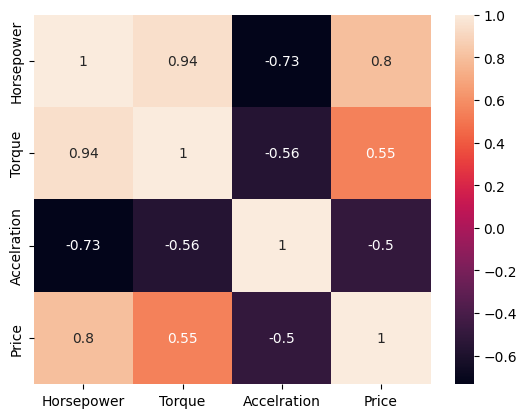

In [2451]:
# df.corr(numeric_only=True)
d=df[['Engine_Size', 'Horsepower', 'Torque', 'Accelration', 'Price',]]
correlation=d.corr(numeric_only=True)
sns.heatmap(data=correlation,annot=True)

2. Bar Plot of Average Horsepower by Car Make

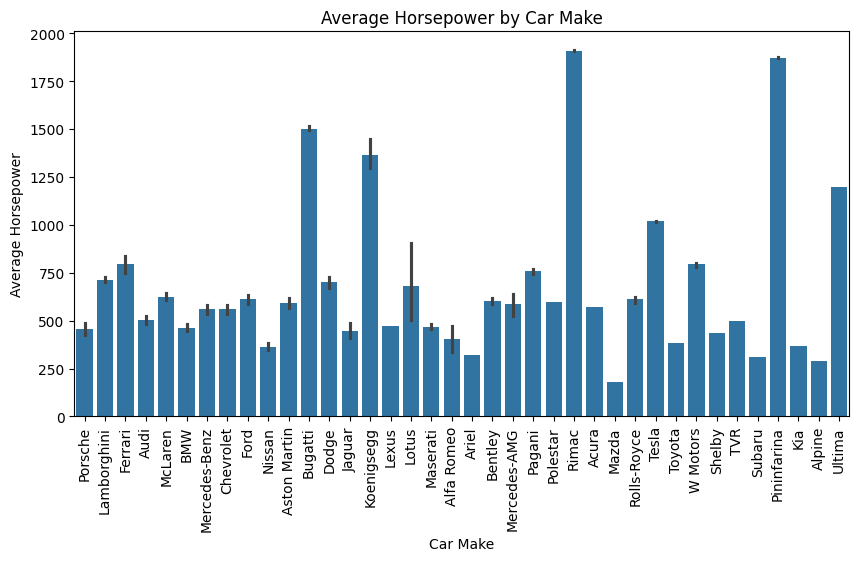

In [2439]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Car Make', y='Horsepower')
plt.xlabel('Car Make')
plt.xticks(rotation=90)
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Car Make')
plt.show()

3.  Scatter Plot: Engine Size vs Horsepower

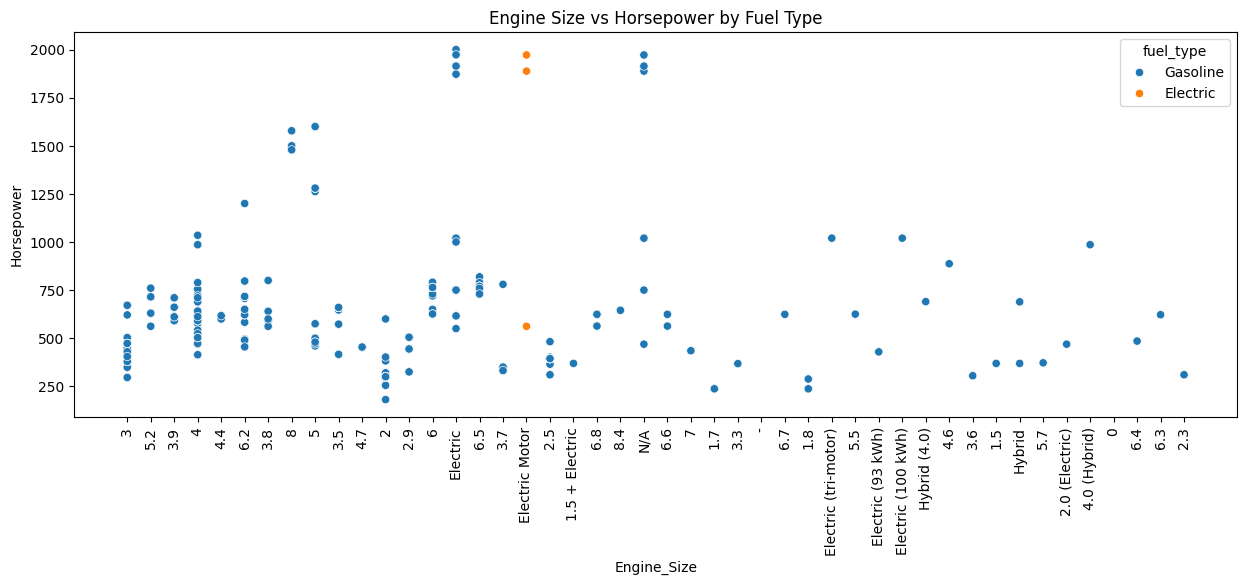

In [2440]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='Engine_Size', y='Horsepower', hue='fuel_type')
plt.xticks(rotation=90)
plt.title('Engine Size vs Horsepower by Fuel Type')
plt.show()

4. Box Plot: Price Distribution by Fuel Type

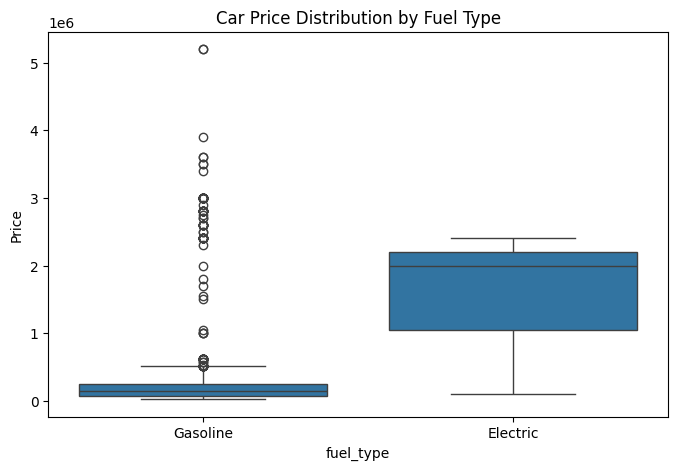

In [2441]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='fuel_type', y='Price')
plt.title('Car Price Distribution by Fuel Type')
plt.show()


5. Line Plot: Horsepower over the Years

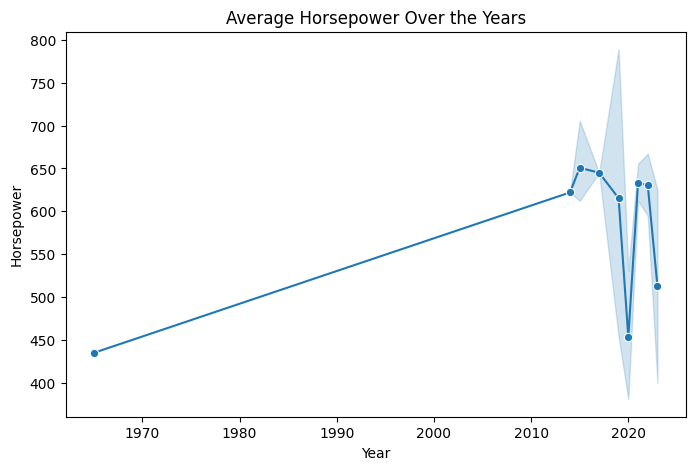

In [2442]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Year',y='Horsepower',marker='o')
plt.title('Average Horsepower Over the Years')
plt.show()


6.  Pie Chart: Count of Cars by Fuel Type

In [2443]:
df['fuel_type'].value_counts()

fuel_type
Gasoline    1004
Electric       3
Name: count, dtype: int64

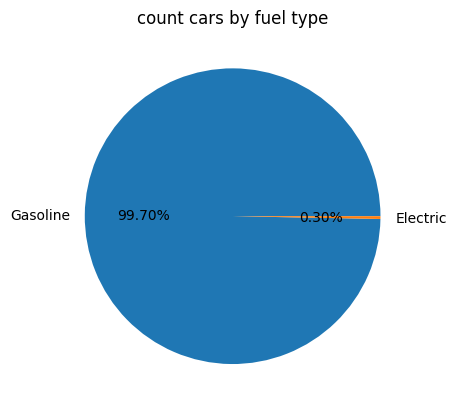

In [2444]:
fuel=df['fuel_type'].value_counts()
plt.pie(x=fuel.values,labels=fuel.index,autopct='%.2f%%')
plt.title('count cars by fuel type')
plt.show()

7.  Histogram: Distribution of Horsepower

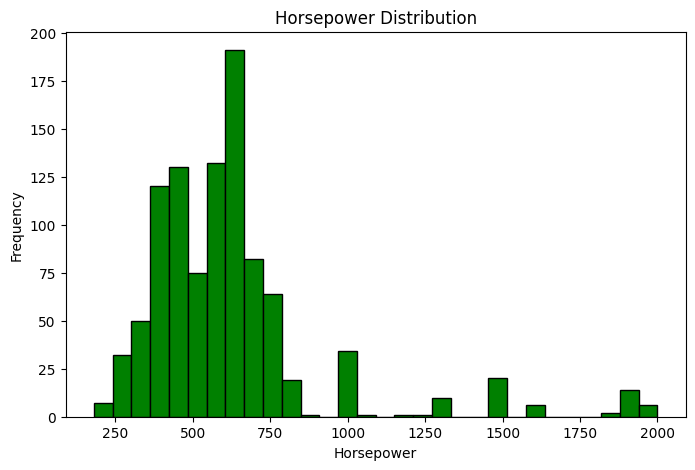

In [2445]:
plt.figure(figsize=(8,5))
plt.hist(df['Horsepower'], bins=30, color='green', edgecolor='black')
plt.title('Horsepower Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()


8.  KDE Plot: Horsepower Density by Fuel Type

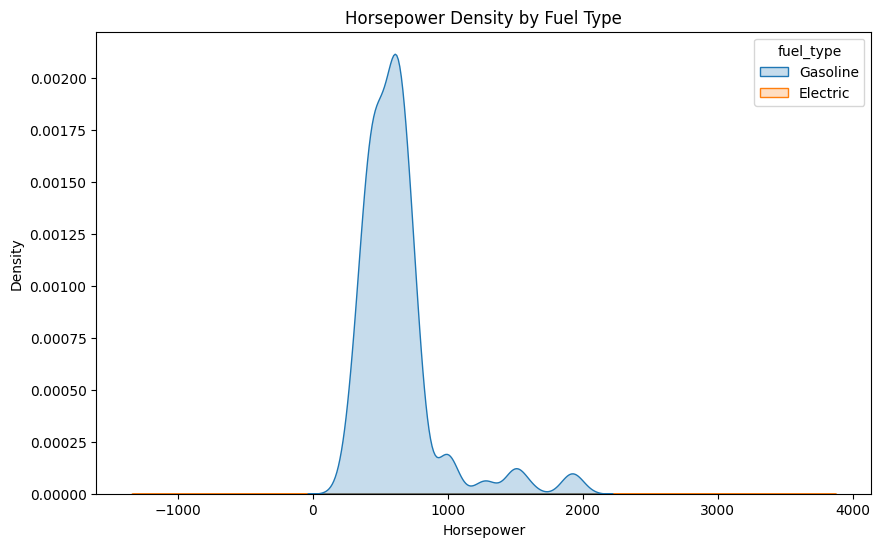

In [2446]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Horsepower',hue='fuel_type',fill=True)
plt.title('Horsepower Density by Fuel Type')
plt.show()


9. Number of Cars per Year

C:\Users\schan\AppData\Local\Temp\ipykernel_26900\389536034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='mako')


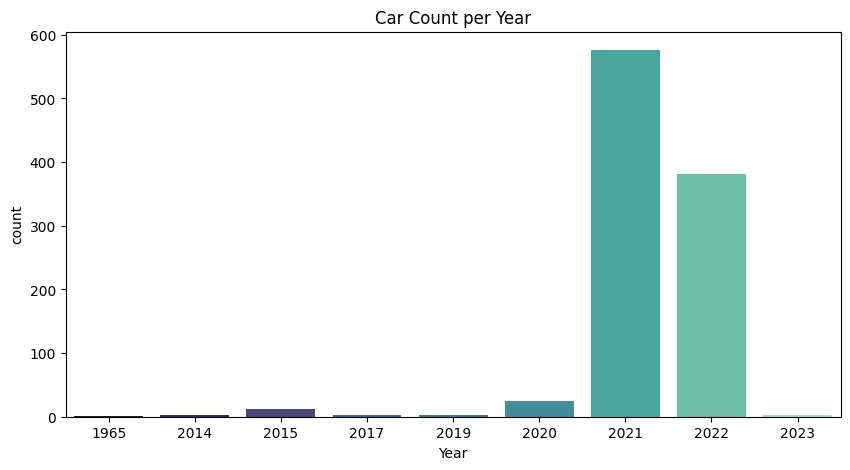

In [2447]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', palette='mako')
plt.title('Car Count per Year')
plt.show()


10.  Horsepower vs Torque

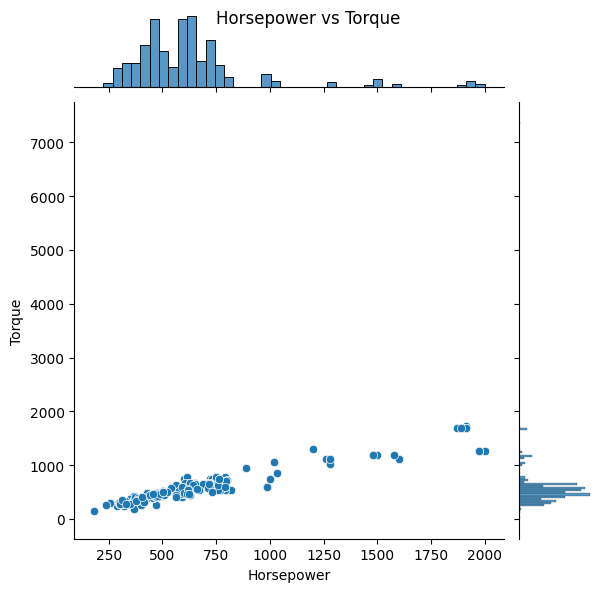

In [2448]:
sns.jointplot(data=df, x='Horsepower', y='Torque', kind='scatter')
plt.suptitle('Horsepower vs Torque')
plt.show()


11. Numeric Relationships

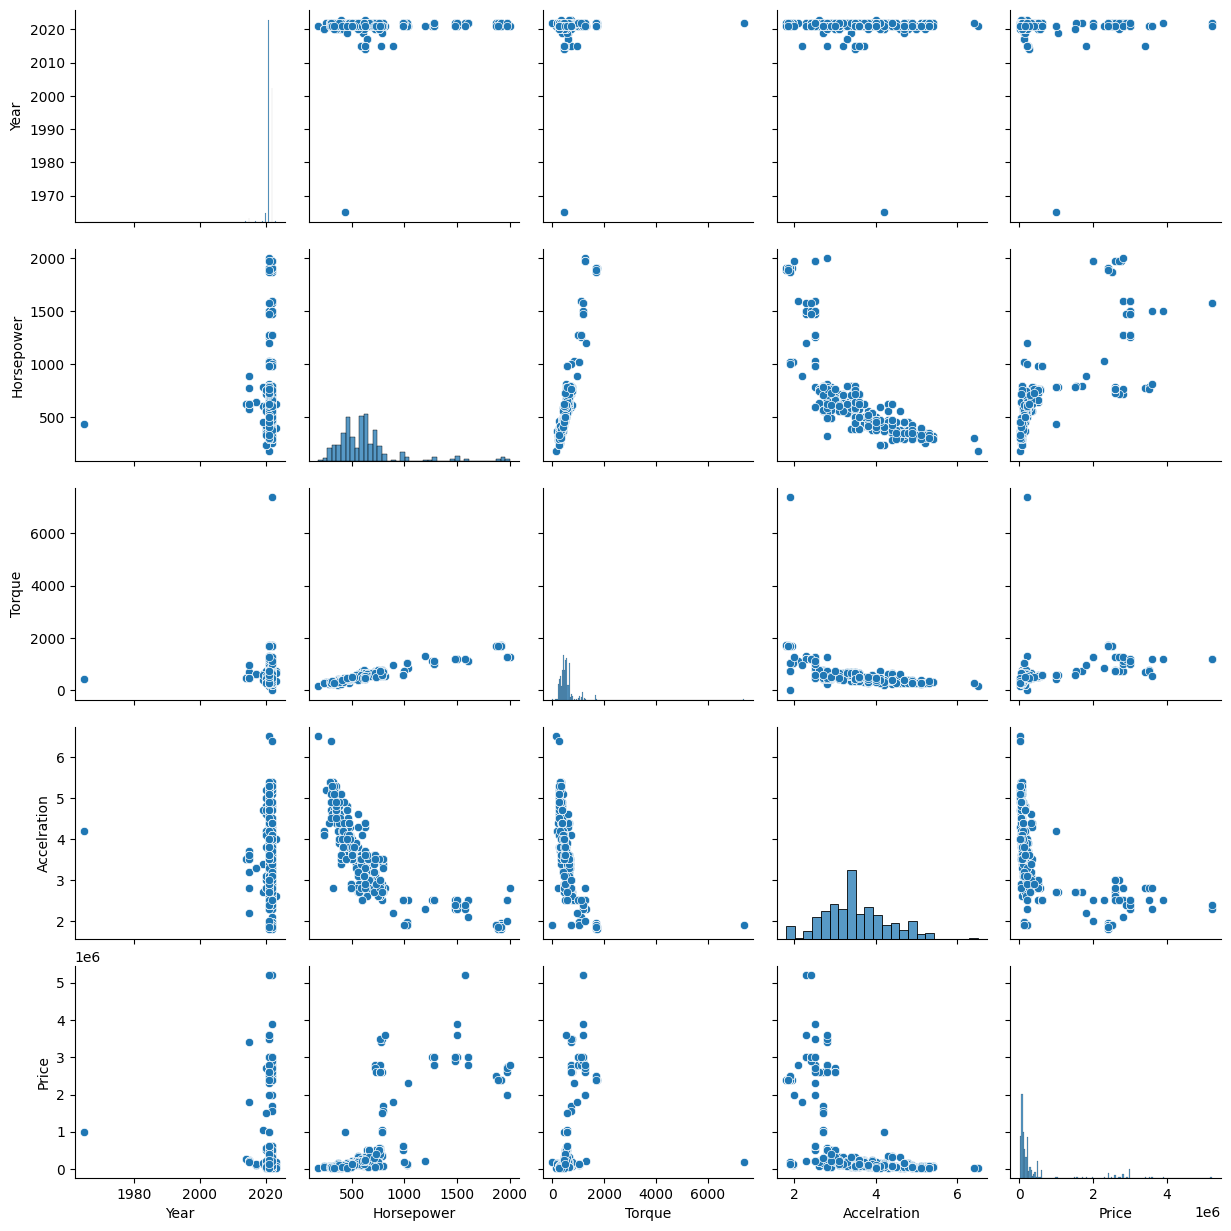

In [2449]:
sns.pairplot(df)

12. Top 10 Expensive Cars

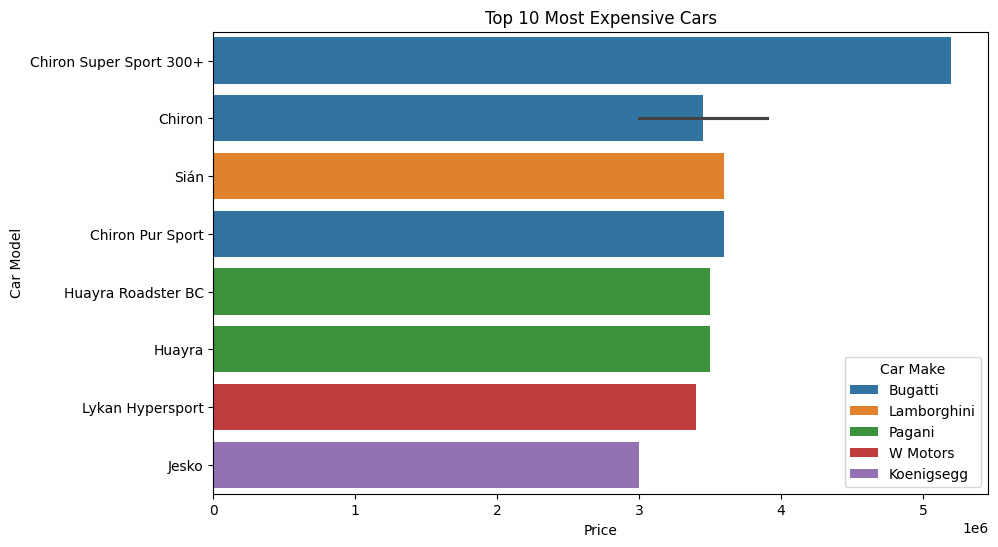

In [2450]:
top10 = df.sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='Car Model', x='Price', hue='Car Make')
plt.title('Top 10 Most Expensive Cars')
plt.show()
